
### Análise de Homicídios 

,Natureza,Sigla
0,Homicídio Doloso,HD
1,Homicídio Doloso Acidente de Transito,HDAT
2,Homicídio Culposo Acidente de Transito,HCAT
3,Homicídio Culposo Outros,HCO
4,Tentativa de Homicídio,TH


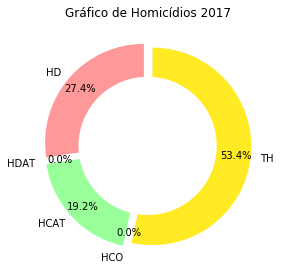

,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,HD,20,27.4
1,HDAT,0,0.0
2,HCAT,14,19.18
3,HCO,0,0.0
4,TH,39,53.42


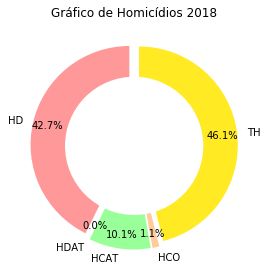

,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,HD,38,42.7
1,HDAT,0,0.0
2,HCAT,9,10.11
3,HCO,1,1.12
4,TH,41,46.07


 ---------------------------------------------------------------
 Análise Geral de Homicidios 
 ---------------------------------------------------------------


,HD,HDAT,HCAT,HCO,TH
2017,20,0,14,0,39
2018,38,0,9,1,41
2019,5,0,3,8,8


,Propriedades,Valores
0,Maior Natureza,TH
1,Média Mensal(TH),3
2,Ano maior frequencia,2018


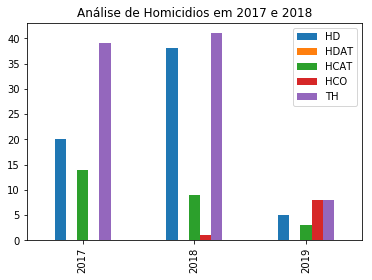

In [232]:
Facade.homicidios()

### Análise de Lesões Corporais

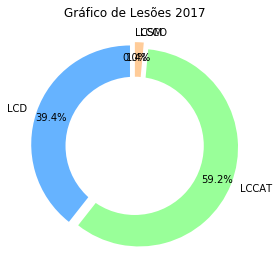

,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,LCSM,0,0.0
1,LCD,219,39.39
2,LCCAT,329,59.17
3,LCCO,8,1.44


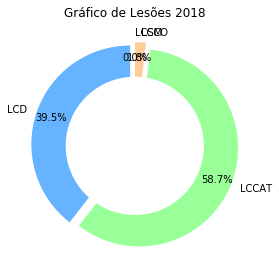

,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,LCSM,0,0.0
1,LCD,219,39.51
2,LCCAT,329,58.74
3,LCCO,8,1.75


 ---------------------------------------------------------------
 Análise Geral de Lesões 
 ---------------------------------------------------------------


,LCSM,LCD,LCCAT,LCCO
2017,0,219,329,8
2018,0,226,336,10
2019,0,68,43,17


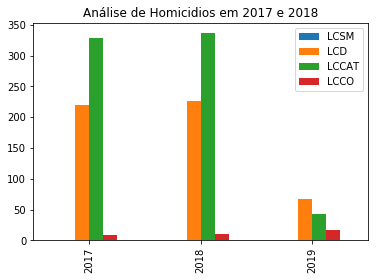

In [225]:
Facade.lesoes()

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

%matplotlib inline

###########################################################
## Class Facade
## This class process the datas and build the graphs and tables || its a middleware
###########################################################
class Facade:
    
    @staticmethod
    def mensagem(mensagem):
        print(' ---------------------------------------------------------------')
        print(' {0} '. format(mensagem))
        print(' ---------------------------------------------------------------')
    
    @staticmethod 
    def lesoes():
        #Table.showLesoesSigla()
        Facade.lesoesEstatistica()
        
        a = Data.getLesoes('2017')
        b = Data.getLesoes('2018')
        c = Data.getLesoes('2019')
        
        Facade.mensagem('Análise Geral de Lesões')
        fig, (ax) = plt.subplots(nrows = 1,ncols = 1)
        ax.set_title('Análise de Homicidios em 2017 e 2018')
        df = pd.DataFrame([a, b, c], columns = ['LCSM','LCD','LCCAT','LCCO'], index = ['2017','2018','2019'])
        df.plot.bar(ax = ax)
        display(df)
        
    @staticmethod    
    def lesoesEstatistica():

        #static
        a = Data.getLesoes('2017')
        b = Data.getLesoes('2018')

        ax = Facade.static(a)
        columns =  ['LCSM','LCD','LCCAT','LCCO']
        Facade.drawGraph('pie', columns, ax, ['#ff9999','#66b3ff','#99ff99','#ffcc99'],(0.05,0.05,0.05,0.05), 'Gráfico de Lesões 2017')
        df = Table.create(['Natureza','Frequencia Absoluta','Frequencia Relativa(%)'],[columns, a, ax])
        display(df)

        ax = Facade.static(b)
        Facade.drawGraph('pie', columns, ax, ['#ff9999','#66b3ff','#99ff99','#ffcc99'],(0.05,0.05,0.05,0.05), 'Gráfico de Lesões 2018')
        df = Table.create(['Natureza','Frequencia Absoluta','Frequencia Relativa(%)'],[columns, a, ax])
        display(df)
        
    @staticmethod
    def homicidios():
        Table.showHomicidiosSigla()
        Facade.homicidiosEstatistica()
         #Graph and Table
        a = Data.getHomicidios('2017')
        b = Data.getHomicidios('2018')
        c = Data.getHomicidios('2019')
        
        Facade.mensagem('Análise Geral de Homicidios')
        fig, (ax) = plt.subplots(nrows = 1,ncols = 1)
        ax.set_title('Análise de Homicidios em 2017 e 2018')
        df = pd.DataFrame([a, b, c], columns = ['HD','HDAT','HCAT','HCO','TH'], index = ['2017','2018','2019'])
        df.plot.bar(ax = ax)
        display(df)
        df = Table.create(['Propriedades', 'Valores'],[
                                                    ['Maior Natureza','Média Mensal(TH)','Ano maior frequencia'],
                                                    ['TH', '3','2018']
                                                    ])
        display(df)
       
        
    @staticmethod    
    def homicidiosEstatistica():

        #static
        a = Data.getHomicidios('2017')
        b = Data.getHomicidios('2018')
        ax = Facade.static(a)
        columns = ['HD','HDAT','HCAT','HCO','TH']
        Facade.drawGraph('pie', columns, ax, ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffea23'],(0.05,0.05,0.05,0.05,0.05), 'Gráfico de Homicídios 2017')
        df = Table.create(['Natureza','Frequencia Absoluta','Frequencia Relativa(%)'],[columns, a, ax])
        display(df)
        
        ax = Facade.static(b)
        columns = ['HD','HDAT','HCAT','HCO','TH']
        Facade.drawGraph('pie', columns, ax, ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffea23'],(0.05,0.05,0.05,0.05,0.05), 'Gráfico de Homicídios 2018')
        df = Table.create(['Natureza','Frequencia Absoluta','Frequencia Relativa(%)'],[columns, b, ax])
        display(df)

    
    ##################### UTILS
    @staticmethod 
    def drawGraph(graph, labels, data, colors, explode, title):
        if graph is 'pie':
            plt.pie(data, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
            #draw circle
            centre_circle = plt.Circle((0,0),0.70,fc='white')
            fig = plt.gcf()
            fig.gca().add_artist(centre_circle)
            plt.title(title)
            plt.tight_layout()
            plt.show()

    @staticmethod
    def static(a):
        sa = sum(a)
        return [str(round(((a[x] * 100)/ sa), 2)) for x in range(len(a))]
        

###########################################################
## This class call the CSV Files and convert to a matrix
###########################################################
class CsvI:
    
    @staticmethod
    def read(file):
        matrix = []
        
        with open(file, encoding="utf8") as csvFile:
            reader = csv.reader(csvFile)
            for row in reader:
                matrix.append(row)
            csvFile.close()
        
        return matrix
###########################################################
## This class build tables
###########################################################
class Table:

    @staticmethod
    def create(titles, values):
        dic = {}
        for i in range(len(titles)):
            dic[titles[i]] = values[i]
        df = pd.DataFrame(dic)
        return df
    
    @staticmethod
    def showHomicidiosSigla():
        display(Table.create(['Natureza', 'Sigla'], 
                            [
                                ['Homicídio Doloso',
                                 'Homicídio Doloso Acidente de Transito',
                                 'Homicídio Culposo Acidente de Transito',
                                 'Homicídio Culposo Outros',
                                'Tentativa de Homicídio'],
                                ['HD','HDAT','HCAT','HCO','TH']
                            ]
                            ))
    
    def formatLines(matrix, aux = None):
        dic = []
        for l in range(len(matrix[0])):
            dic.append([])
            if aux is not None:
                dic[l].append(aux[l])
            for j in range(len(matrix)):
                dic[l].append(matrix[j][l])
        return dic
                
            
    
###########################################################
## This class process the datas
###########################################################
class Data:

    @staticmethod 
    def getHomicidios(year):
        dic = []
        lines = [1,3,5,6,7]
        
        for l in range(len(lines)):
            dic.append([])
            dic[l] = 0
            for d in range(len(DPS)):
                dic[l] += int(DPS[d]['{0}M'.format(year)][lines[l]][13])
            
        return dic
    
    @staticmethod 
    def getLesoes(year):
        dic = []
        lines = [8,9,10,11]
        
        for l in range(len(lines)):
            dic.append([])
            dic[l] = 0
            for d in range(len(DPS)):
                dic[l] += int(DPS[d]['{0}M'.format(year)][lines[l]][13])
            
        return dic
                   
        
    
DP01 = {
    '2017': CsvI.read('./data/DP012017.csv'),
    '2017M': CsvI.read('./data2/DP012017.csv'),
    '2018' : CsvI.read('./data/DP012018.csv'),
    '2018M' : CsvI.read('./data2/DP012018.csv'),
    '2019' : CsvI.read('./data/DP012019.csv'),
    '2019M' : CsvI.read('./data2/DP012019.csv')
}
DP02 = {
    '2017': CsvI.read('./data/DP022017.csv'),
    '2017M':CsvI.read('./data2/DP022017.csv'),
    '2018' : CsvI.read('./data/DP022018.csv'),
    '2018M': CsvI.read('./data2/DP022018.csv'),
    '2019' : CsvI.read('./data/DP022019.csv'),
    '2019M':CsvI.read('./data/DP022019.csv'),
}
DP03= {
    '2017': CsvI.read('./data/DP032017.csv'),
    '2017M': CsvI.read('./data2/DP032017.csv'),
    '2018' : CsvI.read('./data/DP032018.csv'),
    '2018M' : CsvI.read('./data2/DP032018.csv'),
    '2019' : CsvI.read('./data/DP032019.csv'),
    '2019M' : CsvI.read('./data2/DP032019.csv')
}

DPS = [DP01, DP02, DP03]
